## 2 feature engineering <a id='2_feature engineering'></a>

### 2.1 Load relevant libraries and data

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [138]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [139]:
file='data/df_new.csv'
df=pd.read_csv(file)

In [140]:
df.columns

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'ID', 'LIMIT_BAL', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [141]:
df.dtypes

SEX          int64
EDUCATION    int64
MARRIAGE     int64
ID           int64
LIMIT_BAL    int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [142]:
df.set_index('ID')

,SEX,EDUCATION,MARRIAGE,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,2,2,1,20000,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,2,2,2,120000,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,2,2,2,90000,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,2,2,1,50000,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,1,2,1,50000,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1,3,1,220000,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,1,3,2,150000,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,1,2,2,30000,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### 2.2 organize the categorical features and convert them into dummy variables

Categorical features without any order of precedence are called nominal features. There are several nominal features in this data set, for instance, sex, marriage and default. Categorical features which have some order associated with them are called ordinal features.such as education. Continous numerical features can turn into ordinal categorical features. For example, we can convert 'AGE' in df into an ordinal features.   

There are many ways to encode categorical variables. For details, we can check [the datacamp tutorial](https://www.datacamp.com/community/tutorials/categorical-data). When we use label encoding, we simply convert the category name into numbers. It's straight-forward, but it has disadvantage. Some algorithms may misinterprete the numerical values. Hence, we need one-hot encoding, which can convert categorical features into dummy variables. We can use pandas.get_dummies(), or LabelBinarizer and OneHotEncoder in the preprocessing module of scikit-learn.

In [143]:
#check nomical categorical variables and prepare to convert them into dummy variables
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [144]:
#We have the similar problem for MARRIAGE features
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [145]:
df.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [146]:
df_new=pd.get_dummies(df, columns=['MARRIAGE','SEX','EDUCATION'], drop_first=True)
df_new.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,MARRIAGE_2,MARRIAGE_3,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1000,0,2000,1,1,0,1,1,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,5000,0,1,0,1,1,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1100,1069,1000,0,0,0,1,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,9000,689,679,0,0,0,0,1,0,0


### 2.3 convert continous features into ordinal categorical features

In [147]:
#previously we found AGE, LIMIT_BAL, BILL_AMT, PAY_AMT are all showed right-skewed. Using pandas qcut function, we can convert the continuous variable into ordinal categorical variables based on percentile of the original data.
#Such operation can help us perform better client segmentation
print(df_new.AGE.min(), df_new.AGE.max())

21 79


In [148]:
age_bins=[20, 30, 40, 50, 60, 70, 80]
age_label=list(range(1, 7))
df_new['AGE']=pd.cut(df_new['AGE'], bins=age_bins, labels=age_label, right=False)

In [149]:
df_new.AGE.groupby(df_new['DEFAULT']).value_counts(normalize=True).unstack(fill_value=0).round(3)

AGE,1,2,3,4,5,6
DEFAULT,,,,,,
0,0.318,0.384,0.213,0.075,0.010,0.001
1,0.331,0.343,0.224,0.088,0.013,0.001


People with age 20-30, and 30-40 are consistently the dominant clients regardless of the DEFAULT status.

In [150]:
print(df_new.LIMIT_BAL.min(), df_new.LIMIT_BAL.max())

10000 1000000


In [151]:
bal_bins=[10000, 100000, 200000, 400000, 600000, 800000, 1000001]
bal_label=list(range(1, 7))
df_new['LIMIT_BAL']=pd.cut(df_new['LIMIT_BAL'], bins=bal_bins, labels=bal_label, right=False)
df_new.LIMIT_BAL.groupby(df_new['DEFAULT']).value_counts().unstack(fill_value=0).round(3)

LIMIT_BAL,1,2,3,4,5,6
DEFAULT,,,,,,
0,8038,5863,7636,1741,83,3
1,3412,1537,1439,239,9,0


Most card holders have credit limit from 10000 to 100000 regardless of the DEFAULT status. 

In [152]:
df_new.head()

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,MARRIAGE_2,MARRIAGE_3,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,1,1,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,1,1,0,0
1,2,2,1,-1,2,0,0,0,2,2682,...,1000,0,2000,1,1,0,1,1,0,0
2,3,1,2,0,0,0,0,0,0,29239,...,1000,1000,5000,0,1,0,1,1,0,0
3,4,1,2,0,0,0,0,0,0,46990,...,1100,1069,1000,0,0,0,1,1,0,0
4,5,1,4,-1,0,-1,0,0,0,8617,...,9000,689,679,0,0,0,0,1,0,0


In [153]:
df_new[df_new['LIMIT_BAL'].isna()]

,ID,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,MARRIAGE_2,MARRIAGE_3,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4


### 2.4 check if we can aggregate the time series transformed predictors

#### 2.4.1 PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6

In [154]:
#check the time series variable sets, their correlation, and their distribution by sns.catplot
#check the past monthly payment
pay=df.filter(regex="PAY_[1-6]", axis=1)
pay.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0


In [155]:
pay_default=pd.concat([pay, df.DEFAULT], axis=1)
pay_default.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,2,2,-1,-1,-2,-2,1
1,-1,2,0,0,0,2,1
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0


<AxesSubplot:xlabel='PAY_6', ylabel='count'>

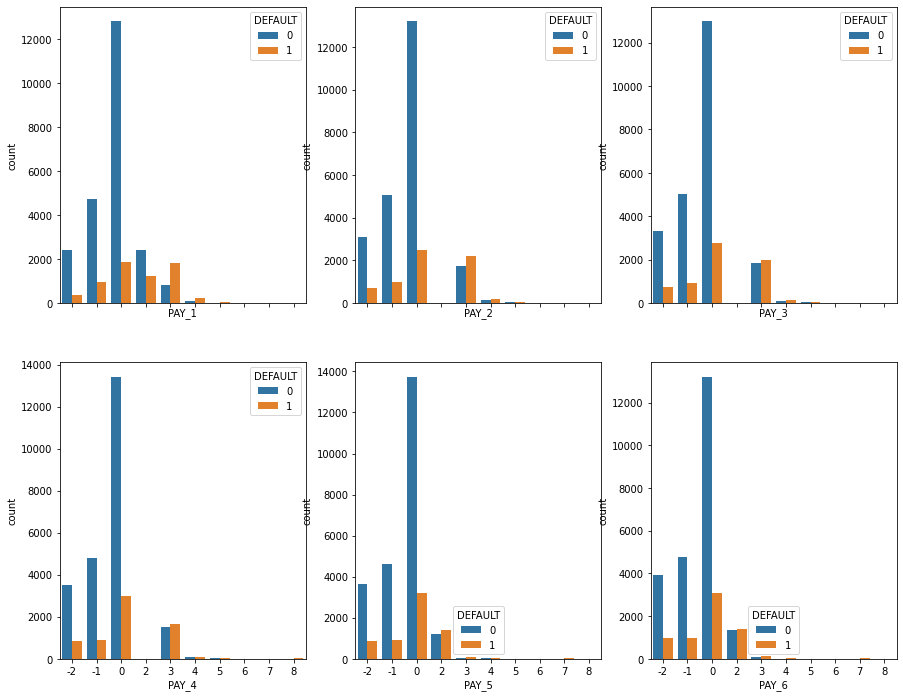

In [156]:
f, axes = plt.subplots(2, 3, figsize=(15, 12), sharex=True)
sns.countplot(x="PAY_1", hue="DEFAULT", data= pay_default, ax=axes[0, 0])
sns.countplot(x="PAY_2", hue="DEFAULT", data= pay_default, ax=axes[0, 1])
sns.countplot(x="PAY_3", hue='DEFAULT', data= pay_default, ax=axes[0, 2])
sns.countplot(x="PAY_4", hue='DEFAULT', data=pay_default, ax=axes[1, 0])
sns.countplot(x="PAY_5", hue='DEFAULT', data=pay_default, ax=axes[1, 1])
sns.countplot(x="PAY_6", hue='DEFAULT', data=pay_default, ax=axes[1,2])

The measurement scale for the payment status is: -2=No consumption; -1 = pay duly; 0 = The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.PAY_0 is payment status in Sep 2005; PAY_1 is payment status in Aug 2005; ...; PAY_6 is payment status in Mar 2005.
For details, check [the discussion](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608).

In [157]:
#What if we sum up all pay_1, pay_2, pay_3, pay_4 and pay_6 and use it as a new predictor?
p_default=pay_default.copy()
p_default['SUM_p']=pay.agg(np.sum, axis=1)
p_default.head()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,SUM_p
0,2,2,-1,-1,-2,-2,1,-2
1,-1,2,0,0,0,2,1,3
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,-1,0,-1,0,0,0,0,-2


<AxesSubplot:xlabel='SUM_p', ylabel='count'>

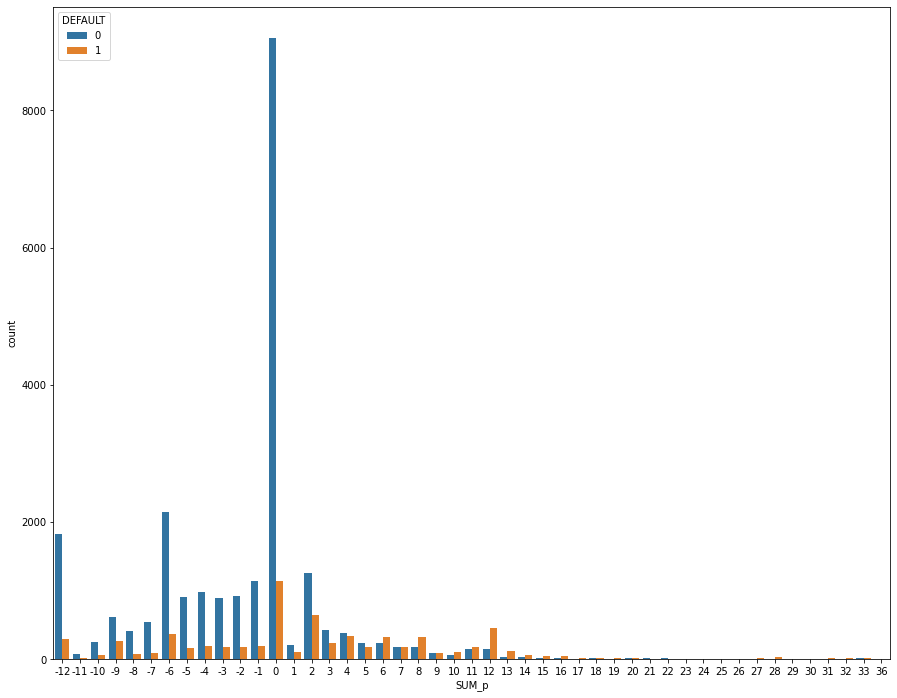

In [158]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
sns.countplot(x="SUM_p", hue="DEFAULT", data= p_default)

Well, we can see the pattern SUM_p is still similar to the single PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6.

In [159]:
#What if we sum up all PAY_1, PAY_2, ..., PAY_6 individually after grouping the clients by DEFAULT?
agg_def_pay=p_default[p_default['DEFAULT']==1][['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0).to_frame()
agg_nondef_pay=p_default[p_default['DEFAULT']==0][['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0).to_frame()

In [160]:
agg_pay=pd.concat([agg_def_pay, agg_nondef_pay], axis=1)
agg_pay.columns=['default','non_default']

<AxesSubplot:>

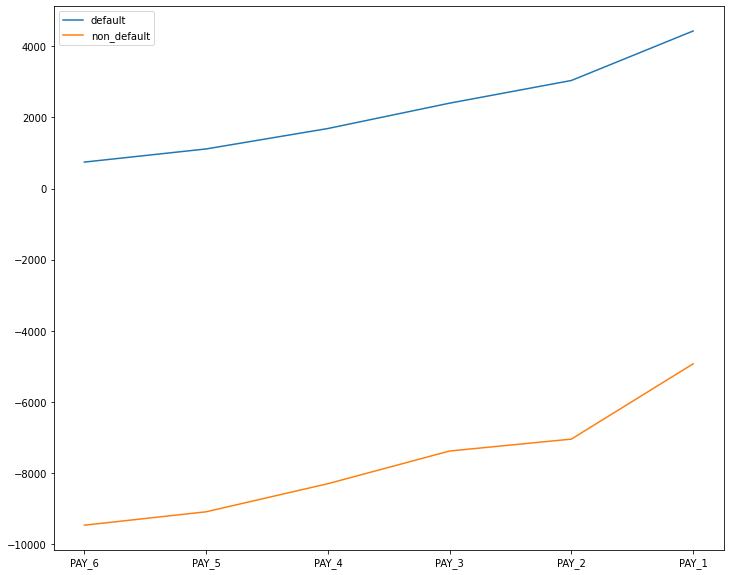

In [161]:
agg_pay.plot(figsize=(12,10))

#We can see the clients with default credit card as a group have increased high payment from March(PAY_6) to Aug (PAY_1). 
#On the contrary, the clients without default credit card as a group have consistently increased low payment from April to Sep.

#### 2.4.2 BILL_AMT1,  BILL_AMT2, BILL_AMT3,  BILL_AMT4, BILL_AMT5,  BILL_AMT6

In [162]:
#check bill_AMT1 to bill_AMT6
bill=df.filter(regex="BILL_AMT[1-6]", axis=1)
b=pd.concat([bill, df.ID], axis=1)
b=b.melt(id_vars=['ID'], value_vars=['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], var_name='Month', value_name='BILL')
b.head()

,ID,Month,BILL
0,1,BILL_AMT1,3913
1,2,BILL_AMT1,2682
2,3,BILL_AMT1,29239
3,4,BILL_AMT1,46990
4,5,BILL_AMT1,8617


BILL_AMT1 is the bill statement in Sep 2005; BILL_AMT2 is the bill statement in Aug 2005; etc 

In [163]:
b.replace({'BILL_AMT1':9, 'BILL_AMT2':8, 'BILL_AMT3':7, 'BILL_AMT3':6, 'BILL_AMT4':5, 'BILL_AMT5':4, 'BILL_AMT6':3}, inplace=True)
bill_default=b.merge(df[['ID','DEFAULT']], how='left', on='ID')
b.head()

,ID,Month,BILL
0,1,9,3913
1,2,9,2682
2,3,9,29239
3,4,9,46990
4,5,9,8617


<AxesSubplot:xlabel='Month', ylabel='BILL'>

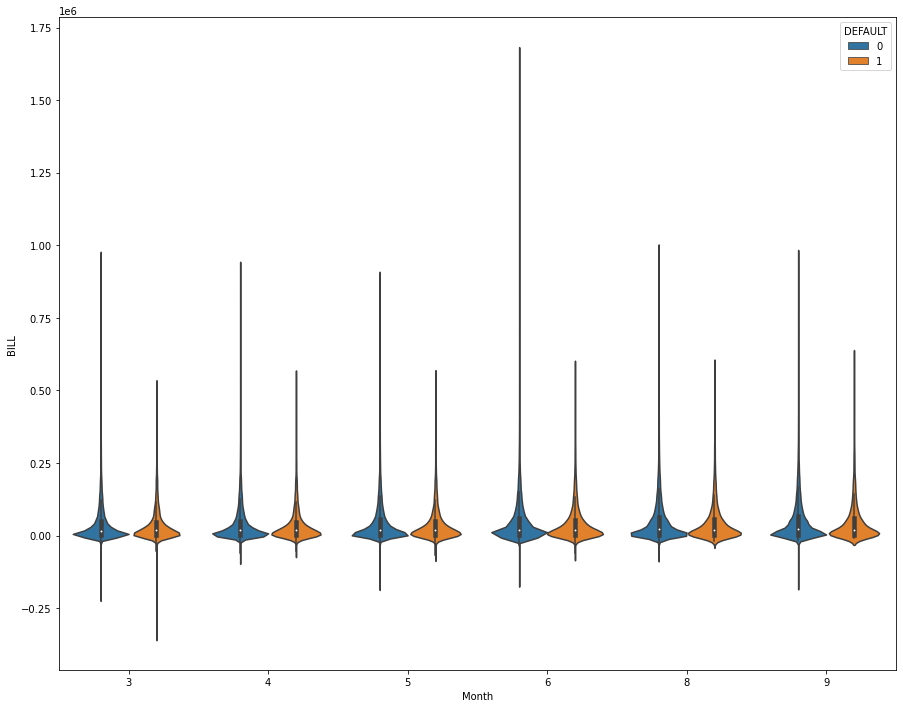

In [164]:
a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
sns.violinplot(ax=ax, x="Month", y='BILL', hue="DEFAULT", data= bill_default)

Generally speaking, the bill statement of the clients with default credit card is lower than the clients without default credit card. It is interesting.

In [165]:
#what if we sum all bills and use it as the predictor instead of six individual bill statement?
bill_default=pd.concat([bill, df.DEFAULT], axis=1)
bill_default['SUM_b']=bill.agg(np.sum, axis=1)
bill_default.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULT,SUM_b
0,3913,3102,689,0,0,0,1,7704
1,2682,1725,2682,3272,3455,3261,1,17077
2,29239,14027,13559,14331,14948,15549,0,101653
3,46990,48233,49291,28314,28959,29547,0,231334
4,8617,5670,35835,20940,19146,19131,0,109339


<AxesSubplot:xlabel='DEFAULT', ylabel='SUM_b'>

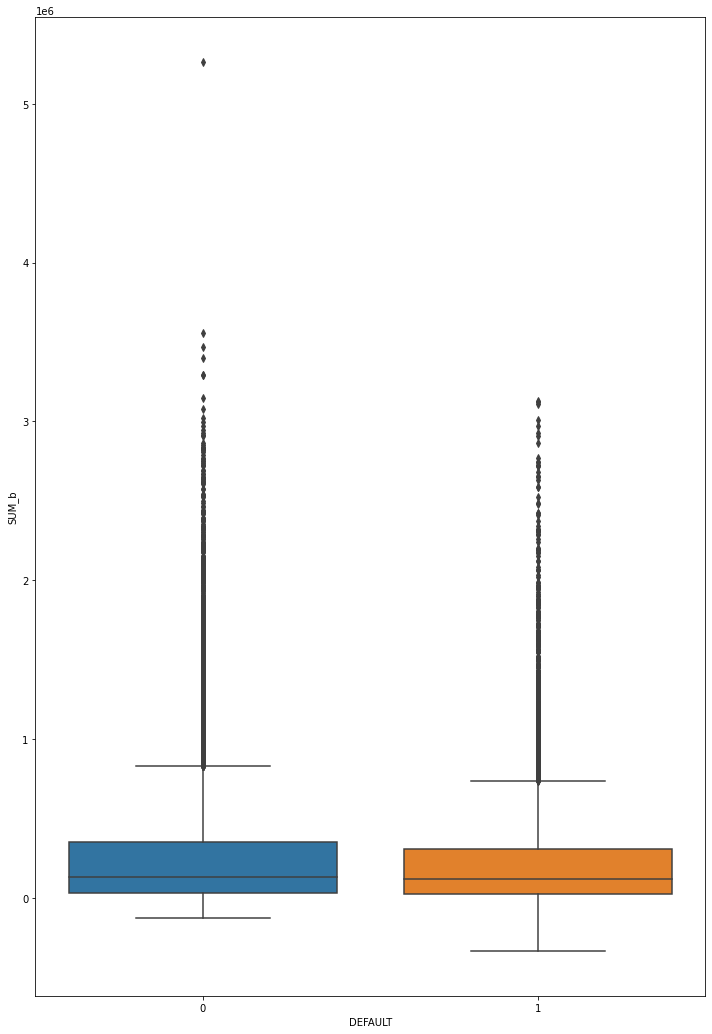

In [166]:
fig, ax = plt.subplots(figsize=(12, 18))
sns.boxplot(y= 'SUM_b', x='DEFAULT', data=bill_default)

The same pattern can be found in the sum of the bill as the individual bill statement features. People without credit card default tend to have higher bill statement than people with credit card default.

In [167]:
#What if we sum up BILL_AMT1, BILL_AMT2, ..., BILL_AMT6 individually after grouping the clients by DEFAULT?
agg_def_bill=bill_default[bill_default['DEFAULT']==1][['BILL_AMT1',  'BILL_AMT2', 'BILL_AMT3',  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=0).to_frame()
agg_nondef_bill=bill_default[bill_default['DEFAULT']==0][['BILL_AMT1',  'BILL_AMT2', 'BILL_AMT3',  'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=0).to_frame()
agg_bill=pd.concat([agg_def_bill, agg_nondef_bill], axis=1)
agg_bill.columns=['default','non_default']
agg_bill

,default,non_default
BILL_AMT1,321906801,1214793126
BILL_AMT2,313774088,1161598167
BILL_AMT3,299825090,1110569554
BILL_AMT4,278957204,1018931265
BILL_AMT5,262388704,946953325
BILL_AMT6,253969246,912183566


<AxesSubplot:>

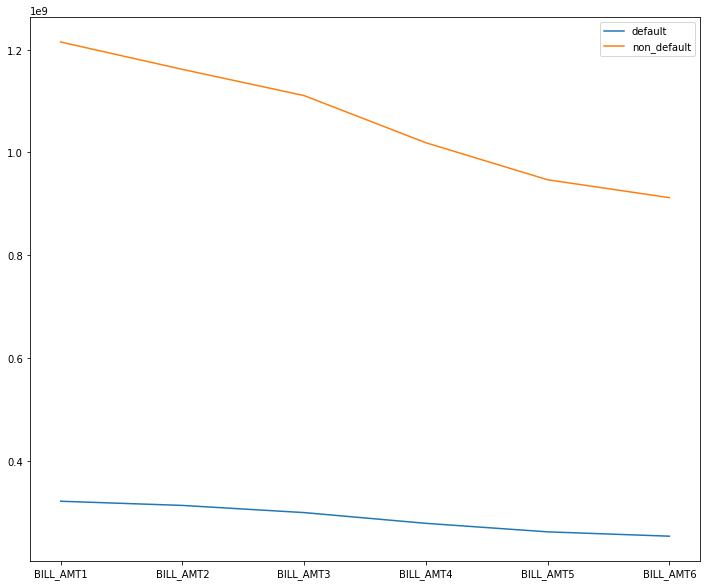

In [168]:
agg_bill.plot(figsize=(12,10))

Obviously the clients without default as a group have much higher BILL_AMT values than the ones with default. 

#### 2.4.3 PAY_AMT1,  PAY_AMT2, PAY_AMT3,  PAY_AMT4, PAY_AMT5,  PAY_AMT6

In [169]:
#how about pay_AMT, the amount of previous payment
pay_AMT=df.filter(regex="PAY_AMT[1-6]", axis=1)
pay_AMT.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [170]:
p=pd.concat([pay_AMT, df.ID], axis=1)
p=p.melt(id_vars=['ID'], value_vars=['PAY_AMT1','PAY_AMT2','PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], var_name='Month', value_name='pay')
p.replace({'PAY_AMT1':9, 'PAY_AMT2':8, 'PAY_AMT3':7, 'PAY_AMT3':6, 'PAY_AMT4':5, 'PAY_AMT5':4, 'PAY_AMT6':3}, inplace=True)
p.head()

,ID,Month,pay
0,1,9,0
1,2,9,0
2,3,9,1518
3,4,9,2000
4,5,9,2000


<AxesSubplot:xlabel='Month', ylabel='pay'>

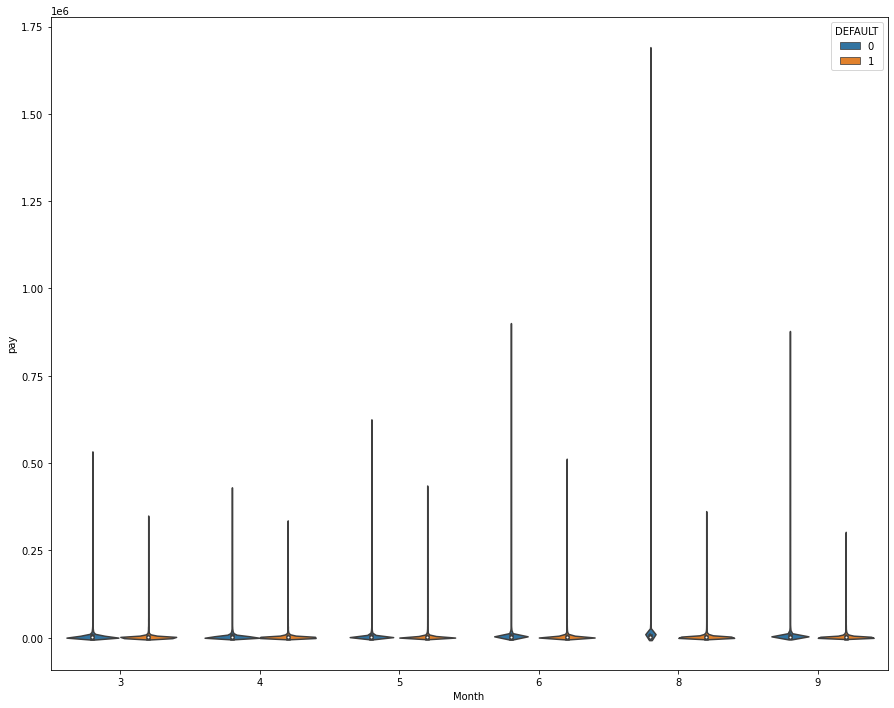

In [171]:
pay_default=p.merge(df[['ID','DEFAULT']], how='left', on='ID')
fig, ax = plt.subplots(figsize=a_dims)
sns.violinplot(ax=ax, x="Month", y='pay', hue="DEFAULT", data= pay_default)

<AxesSubplot:xlabel='DEFAULT', ylabel='SUM_pt'>

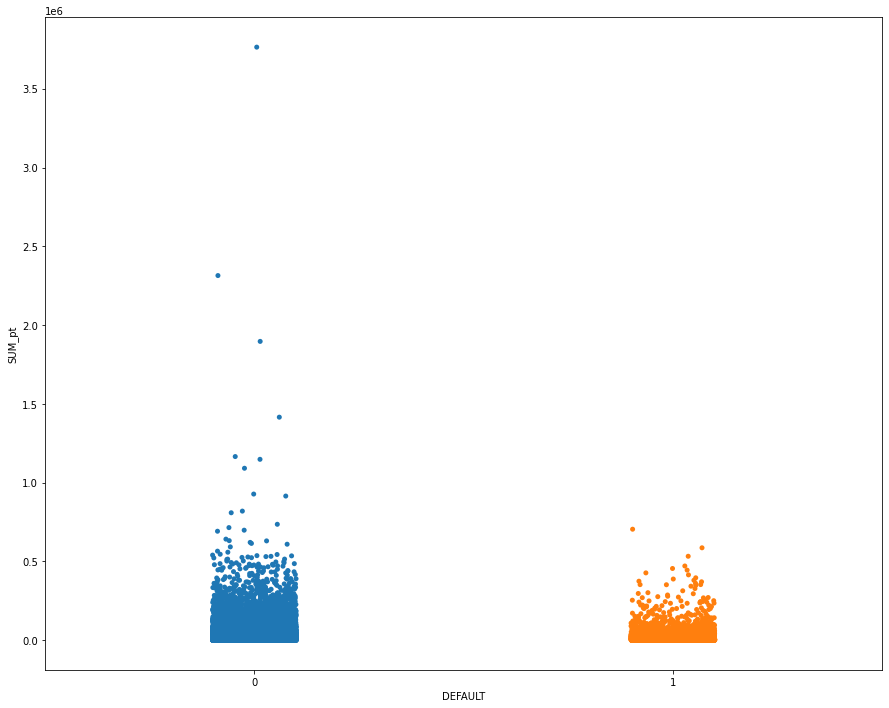

In [172]:
#what happens if we sum all payment and use it as the predictor instead of six individual payment?
p_AMT=pay_AMT.copy()
p_AMT['SUM_pt']=pay_AMT.agg(np.sum, axis=1)
p_AMT_default=pd.concat([p_AMT, df.DEFAULT], axis=1)
fig, ax = plt.subplots(figsize=a_dims)
sns.stripplot(x='DEFAULT', y= 'SUM_pt', data=p_AMT_default)

<AxesSubplot:>

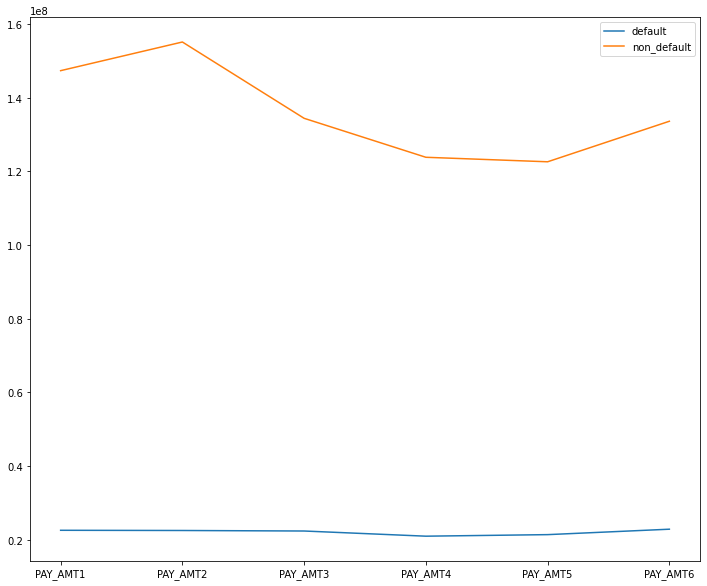

In [173]:
agg_def_pamt=df[df['DEFAULT']==1][['PAY_AMT1',  'PAY_AMT2', 'PAY_AMT3',  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=0).to_frame()
agg_nondef_pamt=df[df['DEFAULT']==0][['PAY_AMT1',  'PAY_AMT2', 'PAY_AMT3',  'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=0).to_frame()
agg_pamt=pd.concat([agg_def_pamt, agg_nondef_pamt], axis=1)
agg_pamt.columns=['default','non_default']
agg_pamt.plot(figsize=(12,10))

Comparing the payment statement, we can see the clients without credit card default have much higher payment than the clients with credit card default.
Combining results from 2.4.2 and 2.4.3, we can get the conclusion: The clients without default as a group have much higher bill statement but less payment than the clients with default. No wonder they got default!!

In [174]:
df_sum=pd.concat([df_new[['ID', 'LIMIT_BAL', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'AGE', 'DEFAULT']], p_default.SUM_p, bill_default.SUM_b, p_AMT_default.SUM_pt], axis=1)
df_sum.head()

,ID,LIMIT_BAL,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3,AGE,DEFAULT,SUM_p,SUM_b,SUM_pt
0,1,1,1,1,0,0,0,0,1,1,-2,7704,689
1,2,2,1,1,0,0,1,0,1,1,3,17077,5000
2,3,1,1,1,0,0,1,0,2,0,0,101653,11018
3,4,1,1,1,0,0,0,0,2,0,0,231334,8388
4,5,1,0,1,0,0,0,0,4,0,-2,109339,59049


In [175]:
df_sum.dtypes

ID                int64
LIMIT_BAL      category
SEX_2             uint8
EDUCATION_2       uint8
EDUCATION_3       uint8
EDUCATION_4       uint8
MARRIAGE_2        uint8
MARRIAGE_3        uint8
AGE            category
DEFAULT           int64
SUM_p             int64
SUM_b             int64
SUM_pt            int64
dtype: object

In [177]:
#make sure the data type is correct before we do data pre-processing
df_sum[['LIMIT_BAL','AGE']]=df_sum[['LIMIT_BAL','AGE']].astype('int64')
df_sum.dtypes

ID             int64
LIMIT_BAL      int64
SEX_2          uint8
EDUCATION_2    uint8
EDUCATION_3    uint8
EDUCATION_4    uint8
MARRIAGE_2     uint8
MARRIAGE_3     uint8
AGE            int64
DEFAULT        int64
SUM_p          int64
SUM_b          int64
SUM_pt         int64
dtype: object

In [179]:
df_new[['LIMIT_BAL','AGE']]=df_new[['LIMIT_BAL','AGE']].astype('int64')
df_new.dtypes

ID             int64
LIMIT_BAL      int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1      int64
BILL_AMT2      int64
BILL_AMT3      int64
BILL_AMT4      int64
BILL_AMT5      int64
BILL_AMT6      int64
PAY_AMT1       int64
PAY_AMT2       int64
PAY_AMT3       int64
PAY_AMT4       int64
PAY_AMT5       int64
PAY_AMT6       int64
DEFAULT        int64
MARRIAGE_2     uint8
MARRIAGE_3     uint8
SEX_2          uint8
EDUCATION_2    uint8
EDUCATION_3    uint8
EDUCATION_4    uint8
dtype: object

### 2.5 data splitting and pre-processing

In [180]:
#We developed two dataset, one including all variables, df_new, another using aggregation functions, df_sum.
#When we develop the model, we will use df_new first to explore the importance of these features
X=df_new.drop(['ID', 'DEFAULT'], axis=1)
y=df_new[['DEFAULT']]

In [182]:
#split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [186]:
#pre_processing the numerical predictors
from sklearn.preprocessing import StandardScaler
st_scaler=StandardScaler()
X_train_s=st_scaler.fit_transform(X_train)
X_test_s=st_scaler.transform(X_test)

It's time for us to export these data sets and use them for modelling in section 3.

### 2.6 export df_new and df_sum

In [187]:
import os
os.getcwd()

'C:\\Users\\gln_d\\Desktop\\Springboard\\Capstone_project_Spring_Board\\credit_card_default'

In [190]:
datapath = './data'
if not os.path.exists(datapath):
    os.mkdir(datapath)
datapath_df_new = os.path.join(datapath, 'df_new.csv')
if not os.path.exists(datapath_df_new):
    df_new.to_csv(datapath_df_new, index=False)

In [191]:
datapath_df_sum = os.path.join(datapath, 'df_sum.csv')
if not os.path.exists(datapath_df_sum):
    df_sum.to_csv(datapath_df_sum, index=False)